# Projeto 1 

O projeto tem o objetivo de classificar os vinhos entre vermelho e branco.

In [1]:
#--- Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

#--- Configurações adicionais

plt.style.use("seaborn-muted")
%matplotlib inline
pd.set_option('display.max_columns', None)

## 1. Concatenando os bancos de dados

In [2]:
banco_red = pd.read_csv("data/winequality-red.csv", sep = ";")
banco_white = pd.read_csv("data/winequality-white.csv", sep = ";")

banco_red["classification"] = "Red"
banco_white["classification"] = "White"

banco = pd.concat([banco_red, banco_white], axis = 0)

f"O dataset possui {banco.shape[0]} observações e {banco.shape[1]} variáveis"

'O dataset possui 6497 observações e 13 variáveis'

In [3]:
banco.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classification
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


## 2. Análise Exploratória

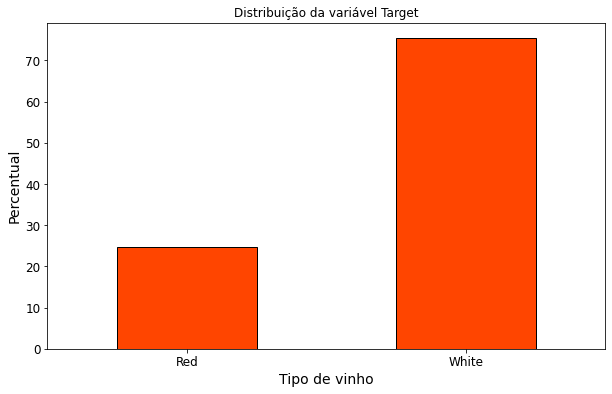

In [4]:
plt.figure(figsize = [10, 6])

banco["classification"].value_counts(normalize = True).mul(100).round(2).sort_values().plot(kind = "bar", color = "orangered", edgecolor = "black")

plt.title(label = "Distribuição da variável Target")
plt.xlabel("Tipo de vinho", fontsize = 14, color = "black")
plt.ylabel("Percentual", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)
plt.show()

In [5]:
banco.drop(["classification", "quality"], axis = 1).describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.22,1.30,3.80,6.40,7.00,7.70,15.90
volatile acidity,6497.0,0.34,0.16,0.08,0.23,0.29,0.40,1.58
citric acid,6497.0,0.32,0.15,0.00,0.25,0.31,0.39,1.66
residual sugar,6497.0,5.44,4.76,0.60,1.80,3.00,8.10,65.80
chlorides,6497.0,0.06,0.04,0.01,0.04,0.05,0.06,0.61
free sulfur dioxide,6497.0,30.53,17.75,1.00,17.00,29.00,41.00,289.00
total sulfur dioxide,6497.0,115.74,56.52,6.00,77.00,118.00,156.00,440.00
density,6497.0,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,6497.0,3.22,0.16,2.72,3.11,3.21,3.32,4.01
sulphates,6497.0,0.53,0.15,0.22,0.43,0.51,0.60,2.00


- As variáveis que mais possuem valores medianos próximos entre as duas classes, na qual o modelo provavelmente indicará alguma possível igualdade entre elas, são:

    - volatily acidity;
    - citric acid;
    - chlorides;
    - density
    - pH
    - sulphates
    - alcohol

In [6]:
banco.drop("quality", axis = 1).groupby("classification").aggregate(["median", "std"]).T.round(2)

classification                 Red   White
fixed acidity        median   7.90    6.80
                     std      1.74    0.84
volatile acidity     median   0.52    0.26
                     std      0.18    0.10
citric acid          median   0.26    0.32
                     std      0.19    0.12
residual sugar       median   2.20    5.20
                     std      1.41    5.07
chlorides            median   0.08    0.04
                     std      0.05    0.02
free sulfur dioxide  median  14.00   34.00
                     std     10.46   17.01
total sulfur dioxide median  38.00  134.00
                     std     32.90   42.50
density              median   1.00    0.99
                     std      0.00    0.00
pH                   median   3.31    3.18
                     std      0.15    0.15
sulphates            median   0.62    0.47
                     std      0.17    0.11
alcohol              median  10.20   10.40
                     std      1.07    1.23

- O gráfico abaixo nos mostra as densidades por vinho (Red e White) de cada variável;

- É problemático se ambos os vinhos possuem o mesmo padrão;

- As únicas variáveis que continuam sendo problemáticas ainda neste cenário são:

    - chlorides
    - free sulfur dioxide
    - ph
    - sulphates 
    - alcohol 

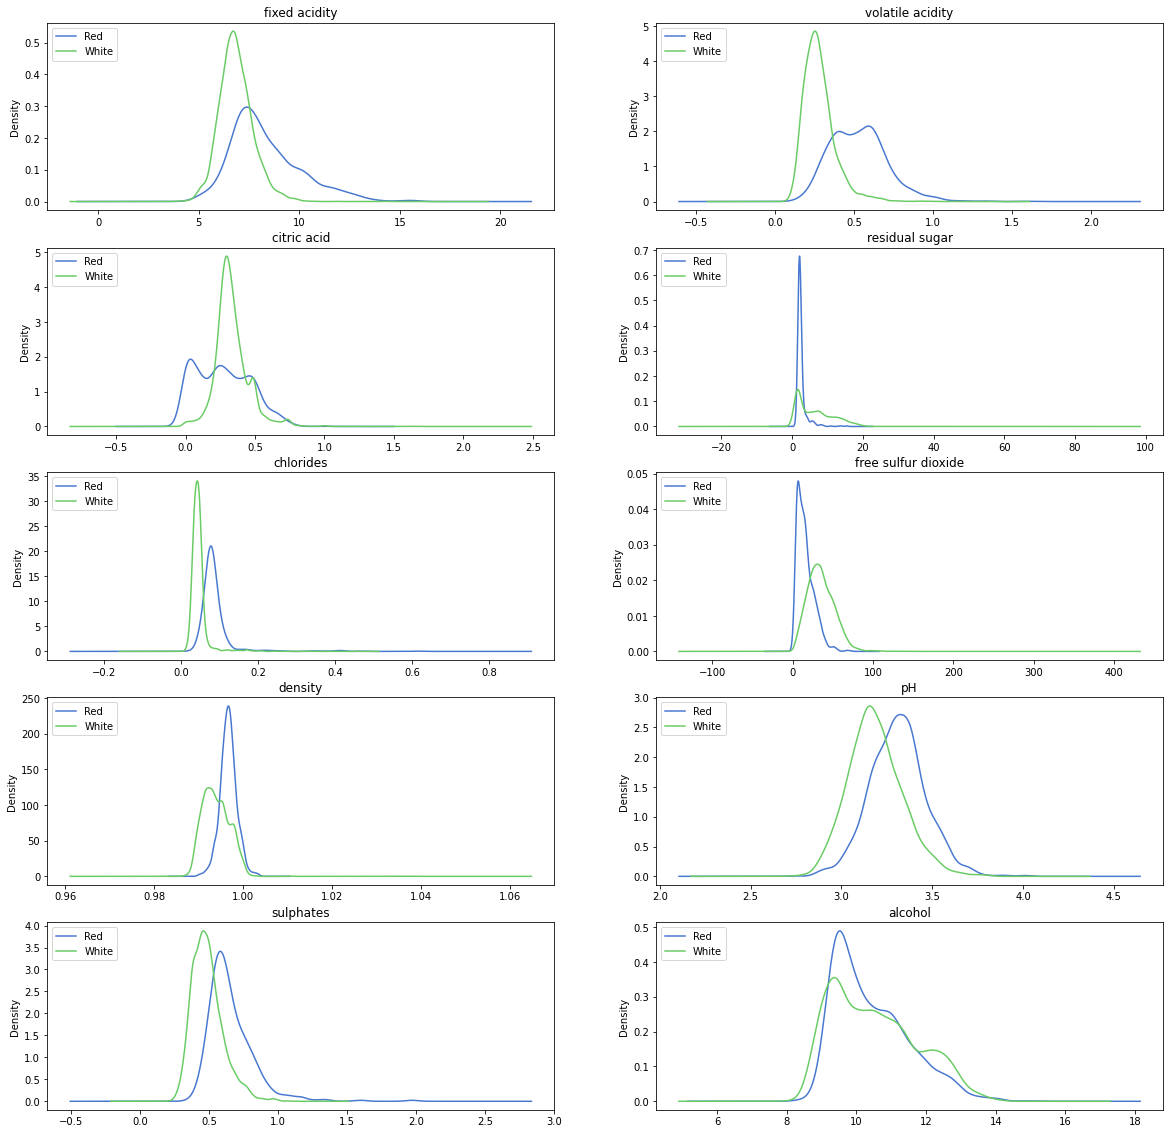

In [7]:
banco_quality_wo = banco.drop(["total sulfur dioxide", "quality"], axis = 1)

f, axes = plt.subplots(5, 2, figsize = (20, 20), sharex = False)

for ax, column in zip(axes.flat, banco_quality_wo.columns):
    banco_quality_wo.groupby("classification")[column].plot(kind = "kde", ax = ax)
    ax.legend(loc = "upper left")
    ax.set_title(column)
    
f.show()

- As únicas relações preocupantes, dado o coeficiente de correlação de Pearson, são a **total_sulfur_dioxide** com a **free_sulfur_dioxide** e o **ph** com o **alcohol**

- Alguns autores na literatura mencionam correlação acima de 0.9 ou abaixo de -0.9 para indicar multicolineariedade.

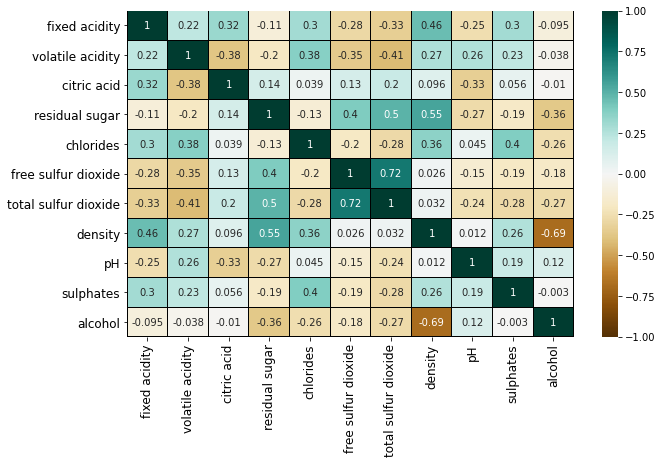

In [8]:
corr_var_quant = banco.drop(["classification", "quality"], axis = 1).corr()

plt.figure(figsize = [10, 6])
sns.heatmap(data = corr_var_quant, vmin = -1, vmax = 1, linewidths = 0.01, linecolor = "black", cmap = "BrBG", annot = True)
plt.xlabel("", fontsize = 14, color = "black")
plt.ylabel("", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.show()

In [9]:
banco["quality"].value_counts(normalize = True).mul(100).round(2)

6    43.65
5    32.91
7    16.61
4     3.32
8     2.97
3     0.46
9     0.08
Name: quality, dtype: float64

### 2.1. Clusterização

In [10]:
# Padronizando os dados

banco_quant = banco.drop(["quality", "classification"], axis = 1)
var_quant = list(banco_quant.columns)

scaler = StandardScaler()

banco_quant[var_quant] = scaler.fit_transform(banco_quant[var_quant])
banco_quant.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464


In [11]:
kmeans = KMeans(n_clusters = 2, init = "random")

kmeans.fit(banco_quant)

KMeans(init='random', n_clusters=2)

In [12]:
class_km = np.where(kmeans.labels_ == 0, "Red", "White") 

pd.crosstab(banco["classification"], class_km, rownames = ["Verdadeiro"], colnames = ["Classificado pelo k-means"], margins = True)

Classificado pelo k-means,Red,White,All
Verdadeiro,,,
Red,1575,24,1599
White,69,4829,4898
All,1644,4853,6497


In [13]:
df_comp_km = pd.DataFrame(data = {"verdadeiro": banco["classification"], "predito_km": class_km})

df_comp_km.head()

,verdadeiro,predito_km
0,Red,Red
1,Red,Red
2,Red,Red
3,Red,Red
4,Red,Red


In [14]:
df_comp_km[df_comp_km["verdadeiro"] != df_comp_km["predito_km"]]

,verdadeiro,predito_km
49,Red,White
354,Red,White
494,Red,White
591,Red,White
634,Red,White
...,...,...
4649,White,Red
4650,White,Red
4792,White,Red
4815,White,Red


# Próximos passos

1. Pegar o index do `df_comp_km` e verificar as similaridades das observações entre as variáveis do banco original
2. Explorar um pouco mais